In [4]:
# Import the dependencies.
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [5]:
# Import the requests library.
import requests

# Import the API key.
from config import weather_api_key

In [6]:
# Import the datetime module from the datetime library.
from datetime import datetime

In [8]:
# Create a set of random latitude and longitude combinations.
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)
lat_lngs

In [9]:
# Add the latitudes and longitudes to a list.
coordinates = list(lat_lngs)

In [10]:
# Use the citipy module to determine city based on latitude and longitude.
from citipy import citipy

In [11]:
# Create a list for holding the cities.
cities = []
# Identify the nearest city for each latitude and longitude combination.
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name

    # If the city is unique, then we will add it to the cities list.
    if city not in cities:
        cities.append(city)
# Print the city count to confirm sufficient count.
len(cities)

602

In [12]:
# Starting URL for Weather Map API Call.
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key

In [13]:
# Create an empty list to hold the weather data.
city_data = []
# Print the beginning of the logging.
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters.
record_count = 1
set_count = 1

# Loop through all the cities in the list.
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
    # Create endpoint URL with each city.
    city_url = url + "&q=" + city.replace(" ","+")

    # Log the URL, record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    # Add 1 to the record count.
    record_count += 1
    
# Run an API request for each of the cities.
    try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

# If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass

# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | georgetown
Processing Record 2 of Set 1 | mataura
Processing Record 3 of Set 1 | hasaki
Processing Record 4 of Set 1 | barentsburg
City not found. Skipping...
Processing Record 5 of Set 1 | chuy
Processing Record 6 of Set 1 | vaini
Processing Record 7 of Set 1 | saskylakh
Processing Record 8 of Set 1 | nanortalik
Processing Record 9 of Set 1 | jacala
Processing Record 10 of Set 1 | saryshagan
City not found. Skipping...
Processing Record 11 of Set 1 | belyy yar
Processing Record 12 of Set 1 | xining
Processing Record 13 of Set 1 | severo-kurilsk
Processing Record 14 of Set 1 | pinhao
Processing Record 15 of Set 1 | lerwick
Processing Record 16 of Set 1 | puerto escondido
Processing Record 17 of Set 1 | longyearbyen
Processing Record 18 of Set 1 | vanimo
Processing Record 19 of Set 1 | salta
Processing Record 20 of Set 1 | bengkulu
Processing Record 21 of Set 1 | provideniya
Processing Record 22 o

Processing Record 41 of Set 4 | west wendover
Processing Record 42 of Set 4 | tuktoyaktuk
Processing Record 43 of Set 4 | lompoc
Processing Record 44 of Set 4 | ahome
Processing Record 45 of Set 4 | havre-saint-pierre
Processing Record 46 of Set 4 | upernavik
Processing Record 47 of Set 4 | yulara
Processing Record 48 of Set 4 | vestmannaeyjar
Processing Record 49 of Set 4 | katsuura
Processing Record 50 of Set 4 | saint-philippe
Processing Record 1 of Set 5 | salinas
Processing Record 2 of Set 5 | aksarka
Processing Record 3 of Set 5 | aswan
Processing Record 4 of Set 5 | aykhal
Processing Record 5 of Set 5 | watsa
Processing Record 6 of Set 5 | mount isa
Processing Record 7 of Set 5 | whitehorse
Processing Record 8 of Set 5 | san cristobal
Processing Record 9 of Set 5 | manono
Processing Record 10 of Set 5 | coihaique
Processing Record 11 of Set 5 | axim
Processing Record 12 of Set 5 | inhambane
Processing Record 13 of Set 5 | asau
Processing Record 14 of Set 5 | wilmington
Processin

Processing Record 33 of Set 8 | lima
Processing Record 34 of Set 8 | namibe
Processing Record 35 of Set 8 | moindou
Processing Record 36 of Set 8 | bubaque
Processing Record 37 of Set 8 | toliary
City not found. Skipping...
Processing Record 38 of Set 8 | marcona
City not found. Skipping...
Processing Record 39 of Set 8 | krasnaya zarya
Processing Record 40 of Set 8 | bilibino
Processing Record 41 of Set 8 | loon
Processing Record 42 of Set 8 | polunochnoye
Processing Record 43 of Set 8 | mitchell
Processing Record 44 of Set 8 | bathsheba
Processing Record 45 of Set 8 | fort saint john
City not found. Skipping...
Processing Record 46 of Set 8 | buala
Processing Record 47 of Set 8 | bati
Processing Record 48 of Set 8 | ojinaga
Processing Record 49 of Set 8 | abha
Processing Record 50 of Set 8 | oistins
Processing Record 1 of Set 9 | sao joao da barra
Processing Record 2 of Set 9 | batagay-alyta
Processing Record 3 of Set 9 | egvekinot
Processing Record 4 of Set 9 | iskateley
Processing 

Processing Record 20 of Set 12 | yuli
Processing Record 21 of Set 12 | mokhsogollokh
Processing Record 22 of Set 12 | kaduy
Processing Record 23 of Set 12 | blagoyevo
Processing Record 24 of Set 12 | saint combs
City not found. Skipping...
Processing Record 25 of Set 12 | huilong
Processing Record 26 of Set 12 | willmar
Processing Record 27 of Set 12 | virginia beach
Processing Record 28 of Set 12 | ondorhaan
City not found. Skipping...
Processing Record 29 of Set 12 | la motte-servolex
Processing Record 30 of Set 12 | kungsbacka
Processing Record 31 of Set 12 | bur gabo
City not found. Skipping...
Processing Record 32 of Set 12 | nguiu
City not found. Skipping...
Processing Record 33 of Set 12 | awjilah
Processing Record 34 of Set 12 | sao paulo de olivenca
Processing Record 35 of Set 12 | manggar
Processing Record 36 of Set 12 | gushikawa
Processing Record 37 of Set 12 | iquique
Processing Record 38 of Set 12 | jitra
Processing Record 39 of Set 12 | pacific grove
Processing Record 40

In [14]:
len(city_data)

555

In [15]:
# Convert the array of dictionaries to a Pandas DataFrame.
city_data_df = pd.DataFrame(city_data)
city_data_df.head(10)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Georgetown,5.41,100.34,87.80,70,20,3.36,MY,2020-10-29 06:34:51
1,Mataura,-46.19,168.86,61.00,74,41,3.00,NZ,2020-10-29 06:34:51
2,Hasaki,35.73,140.83,78.01,43,20,3.36,JP,2020-10-29 06:34:51
3,Chuy,-33.70,-53.46,55.20,73,60,10.20,UY,2020-10-29 06:34:51
4,Vaini,-21.20,-175.20,71.60,73,75,9.17,TO,2020-10-29 06:34:52
5,Saskylakh,71.92,114.08,-0.56,89,5,4.88,RU,2020-10-29 06:34:52
6,Nanortalik,60.14,-45.24,31.50,96,100,6.85,GL,2020-10-29 06:34:52
7,Jacala,21.02,-99.18,55.63,100,100,2.98,MX,2020-10-29 06:34:52
8,Belyy Yar,53.60,91.39,39.20,38,0,24.61,RU,2020-10-29 06:34:52
9,Xining,36.62,101.77,53.89,34,0,3.13,CN,2020-10-29 06:34:52


In [16]:
new_column_order = ["City", "Country", "Date", "Lat", "Lng", "Max Temp", "Humidity", "Cloudiness", "Wind Speed"]
city_data_df = city_data_df[new_column_order]
city_data_df.head(10)

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Georgetown,MY,2020-10-29 06:34:51,5.41,100.34,87.80,70,20,3.36
1,Mataura,NZ,2020-10-29 06:34:51,-46.19,168.86,61.00,74,41,3.00
2,Hasaki,JP,2020-10-29 06:34:51,35.73,140.83,78.01,43,20,3.36
3,Chuy,UY,2020-10-29 06:34:51,-33.70,-53.46,55.20,73,60,10.20
4,Vaini,TO,2020-10-29 06:34:52,-21.20,-175.20,71.60,73,75,9.17
5,Saskylakh,RU,2020-10-29 06:34:52,71.92,114.08,-0.56,89,5,4.88
6,Nanortalik,GL,2020-10-29 06:34:52,60.14,-45.24,31.50,96,100,6.85
7,Jacala,MX,2020-10-29 06:34:52,21.02,-99.18,55.63,100,100,2.98
8,Belyy Yar,RU,2020-10-29 06:34:52,53.60,91.39,39.20,38,0,24.61
9,Xining,CN,2020-10-29 06:34:52,36.62,101.77,53.89,34,0,3.13


In [17]:
# Create the output file (CSV).
output_data_file = "weather_data/cities.csv"
# Export the City_Data into a CSV.
city_data_df.to_csv(output_data_file, index_label="City_ID")

In [18]:
# Extract relevant fields from the DataFrame for plotting.
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

In [20]:
# Import the time module.
import time

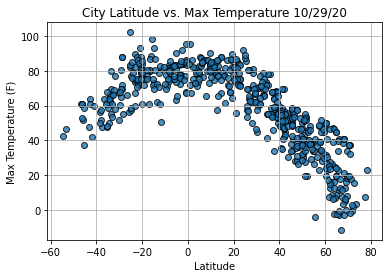

In [21]:
# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            max_temps,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig1.png")

# Show plot.
plt.show()

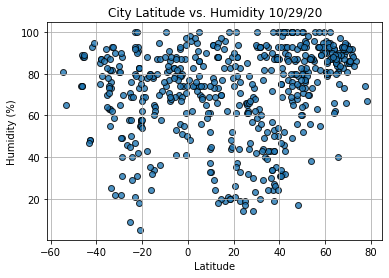

In [22]:
# Build the scatter plots for latitude vs. humidity.
plt.scatter(lats,
            humidity,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Humidity "+ time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig2.png")
# Show plot.
plt.show()

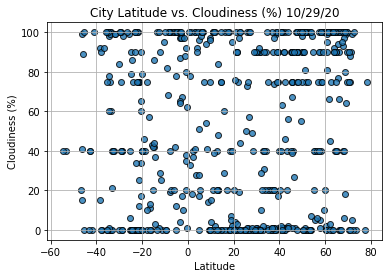

In [23]:
# Build the scatter plots for latitude vs. cloudiness.
plt.scatter(lats,
            cloudiness,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Cloudiness (%) "+ time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig3.png")
# Show plot.
plt.show()

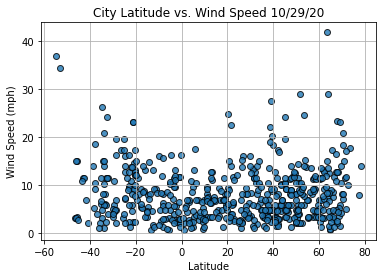

In [24]:
# Build the scatter plots for latitude vs. wind speed.
plt.scatter(lats,
            wind_speed,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Wind Speed "+ time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig4.png")
# Show plot.
plt.show()